In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import utils, datasets, transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F

In [2]:
DATA_DIR = '/kaggle/input/shark-species/sharks/'

In [3]:
data_dict = {'basking': 0,
 'blacktip': 1,
 'blue': 2,
 'bull': 3,
 'hammerhead': 4,
 'lemon': 5,
 'mako': 6,
 'nurse': 7,
 'sand tiger': 8,
 'thresher': 9,
 'tiger': 10,
 'whale': 11,
 'white': 12,
 'whitetip': 13}

In [4]:
transform = transforms.Compose([transforms.Resize((128,128),interpolation=Image.Resampling.NEAREST),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.Grayscale(),
                                 transforms.ToTensor()])

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [5]:
model = torch.jit.load('/kaggle/input/sharkmodel/model_scripted.pt')
model.eval()

RecursiveScriptModule(
  original_name=CNNModel
  (cnn1): RecursiveScriptModule(original_name=Conv2d)
  (relu1): RecursiveScriptModule(original_name=ReLU)
  (maxpool1): RecursiveScriptModule(original_name=MaxPool2d)
  (cnn2): RecursiveScriptModule(original_name=Conv2d)
  (relu2): RecursiveScriptModule(original_name=ReLU)
  (maxpool2): RecursiveScriptModule(original_name=MaxPool2d)
  (cnn3): RecursiveScriptModule(original_name=Conv2d)
  (relu3): RecursiveScriptModule(original_name=ReLU)
  (maxpool3): RecursiveScriptModule(original_name=MaxPool2d)
  (cnn4): RecursiveScriptModule(original_name=Conv2d)
  (relu4): RecursiveScriptModule(original_name=ReLU)
  (maxpool4): RecursiveScriptModule(original_name=MaxPool2d)
  (fc1): RecursiveScriptModule(original_name=Linear)
)

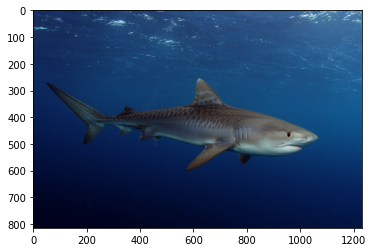

blacktip


In [6]:
img = Image.open('/kaggle/input/shark-species/sharks/tiger/00000006.png')
transform = transforms.Compose([transforms.Resize((128,128),interpolation=Image.Resampling.NEAREST),
                                transforms.Grayscale(),
                                 transforms.ToTensor()])
# unsqueeze provides the batch dimension
img_tensor = transform(img).to('cpu').unsqueeze(0)
output = model(img_tensor)
# to binarize the output since I had only 1 class
pred = torch.argmax(F.softmax(output, dim = 1))
# the output pixel intensities will be 0 for background and 1 for foreground class predicted


plt.imshow(img)

plt.show()        
print(list(filter(lambda x: data_dict[x] == pred, data_dict))[0])